In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df.iloc[:, [-2, -1]].values

### using the elbow method to find the optimal number of clusters

In [6]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'WCSS')

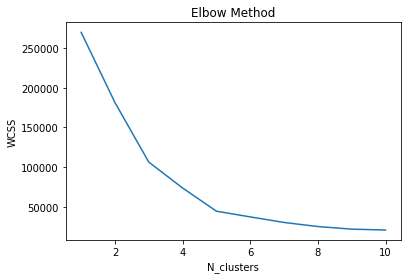

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("N_clusters")
plt.ylabel("WCSS")

## Applying KMeans to the Dataset with the optimal number of clusters obtained from elbow method

In [8]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)

In [9]:
ykmeans = kmeans.fit_predict(X)

In [10]:
ykmeans[:5]

array([4, 3, 4, 3, 4])

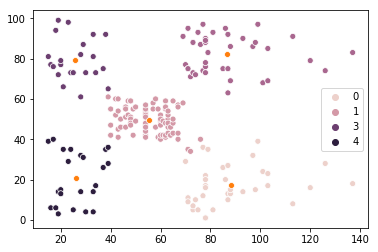

In [11]:
sns.scatterplot(X[:, 0], X[:, 1], hue = ykmeans)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])